<h1><center>Detection of ASL Alphabets</center></h1>

## Problem Statement: 
 Translating ASL signs to English letters for efficient communication. This system will serve as a learning tool for the novice in sign language that involves hand detection.

### Group Members:

1. Anitha Joslin

2. Bharath N

3. Ishita Shewade

4. Kavya Rajiv

### Content:



1. **[Importing Required Libraries](#lib)**
2. **[Image Preprocessing](#ip)**
3. **[Base Model](#bm)**
4. **[Xception Model](#xm)**
5. **[VGG16](#vg)**
6. **[Comparison of Models](#cm)**
7. **[Obtaining Predictions](#op)**
8. **[Conclusion](#co)**


<a id="lib"></a>
### Importing Required Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import split_folders
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Dense,Flatten
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import MobileNet
from PIL import ImageFile
from keras.preprocessing import image
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input as mp
from tensorflow.keras.models import load_model
from warnings import filterwarnings
filterwarnings('ignore')

<a id="ip"></a>
## Image Preprocessing

In [2]:
# Splitting the dataset folder to Train and Validation
split_folders.ratio("Alphabets_1",output="Alphabets_split_1",seed=1337,ratio=(0.8, 0.2))

Copying files: 256 files [00:00, 610.60 files/s]


In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_data=train_datagen.flow_from_directory("Alphabets_split_1/train",target_size=(32, 32),class_mode='categorical',
    batch_size=8)

Found 200 images belonging to 8 classes.


In [4]:
val_datagen=ImageDataGenerator(rescale=1./255)

val_data=val_datagen.flow_from_directory("Alphabets_split_1/val",target_size=(32, 32),class_mode='categorical',
    batch_size=8)

Found 56 images belonging to 8 classes.


<a id="bm"></a>
## Base Model

In [5]:
#Initialising cnn_model
base_model=Sequential()

#Adding 1st Convolution Layer
base_model.add(Conv2D(32,(3,3),activation='relu'))
base_model.add(MaxPooling2D((2,2)))

# Adding a dropout layer
base_model.add(Dropout(0.2))

#Adding a Flatten Layer
base_model.add(Flatten())

#Fully Connected Layer
base_model.add(Dense(64,activation='relu'))
base_model.add(Dense(8,activation='softmax'))

In [6]:
# Compiling the base model using adam optimizer, loss as 'categorical_crossentropy' and metrics as accuracy
base_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
my_base_model=base_model.fit_generator(train_data,
                        steps_per_epoch=200//8,
                         epochs=25,
                         validation_data=val_data,
                         validation_steps=56//8)

Epoch 1/25
25/25 [==============================] - 4s 116ms/step - loss: 2.1451 - accuracy: 0.0950 - val_loss: 2.0200 - val_accuracy: 0.3036
Epoch 2/25
25/25 [==============================] - 1s 34ms/step - loss: 1.9626 - accuracy: 0.2950 - val_loss: 1.8509 - val_accuracy: 0.3929
Epoch 3/25
25/25 [==============================] - 1s 32ms/step - loss: 1.7812 - accuracy: 0.3800 - val_loss: 1.5866 - val_accuracy: 0.5000
Epoch 4/25
25/25 [==============================] - 1s 30ms/step - loss: 1.5379 - accuracy: 0.4400 - val_loss: 1.4944 - val_accuracy: 0.4107
Epoch 5/25
25/25 [==============================] - 1s 30ms/step - loss: 1.3666 - accuracy: 0.4900 - val_loss: 1.3542 - val_accuracy: 0.4464
Epoch 6/25
25/25 [==============================] - 1s 29ms/step - loss: 1.3603 - accuracy: 0.4900 - val_loss: 1.2799 - val_accuracy: 0.4643
Epoch 7/25
25/25 [==============================] - 1s 49ms/step - loss: 1.2009 - accuracy: 0.5350 - val_loss: 1.1414 - val_accuracy: 0.5357
Epoch 8/25
2

In [8]:
# Saving the base model weights
base_model.save("base_model")

INFO:tensorflow:Assets written to: base_model\assets


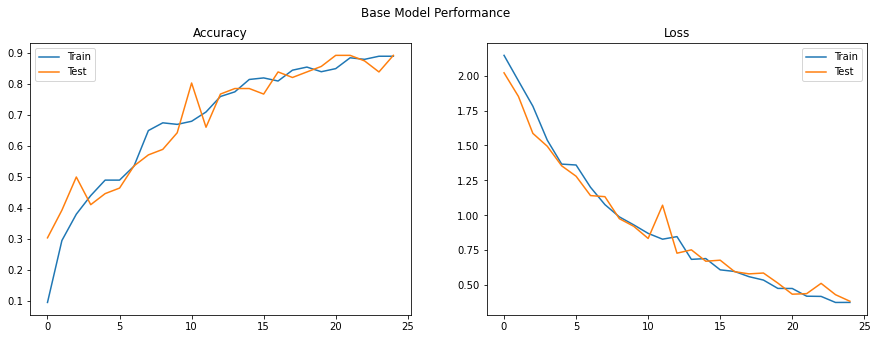

In [9]:
# Comparing performance metrics of the model
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(my_base_model.history['accuracy'],label='Train')
plt.plot(my_base_model.history['val_accuracy'],label='Test')
plt.title("Accuracy")
plt.legend()

plt.subplot(122)
plt.plot(my_base_model.history['loss'],label='Train')
plt.plot(my_base_model.history['val_loss'],label='Test')
plt.title("Loss")
plt.legend()
plt.suptitle("Base Model Performance")
plt.show()

### Inference:

- On building the base model using a single Convolution Layer and adding a dropout layer to it, we get a model giving good results

- The base model accuracy on Train data is 89% and on Test data is 89.2%.

- The base model gives a loss of 0.37 on Train data and 0.38 on Test data.

- Further using pretrained models to obtain better performance results.

<a id="xm"></a>
## Xception Model

In [10]:
# Data augmentation again, since xception model required input shape of the image to be 128x128
train_datagen=ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_data=train_datagen.flow_from_directory("Alphabets_split_1/train",target_size=(128,128),class_mode='categorical',
    batch_size=8)

Found 200 images belonging to 8 classes.


In [11]:
val_datagen=ImageDataGenerator(rescale=1./255)

val_data=val_datagen.flow_from_directory("Alphabets_split_1/val",target_size=(128,128),class_mode='categorical',
    batch_size=8)

Found 56 images belonging to 8 classes.


In [12]:
# Excluding the Convolution layers of the Xception model and setting the input shape same as that of target size during Data Augmentation
model=Xception(input_shape=(128,128,3),include_top=False)

In [13]:
# Train the weights of only the dense layers 
for layers in model.layers:
    if('dense' not in layers.name):
        layers.trainable=False
    if('dense' in layers.name):
        layers.trainable=True

In [14]:
#Adding the new dense layers to the Xception model
xception_model=Sequential([model,
                          Flatten(),
                          Dense(32,activation='relu'),
                          Dense(8,activation='softmax')])
xception_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 4, 4, 2048)        20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1048608   
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 264       
Total params: 21,910,352
Trainable params: 1,048,872
Non-trainable params: 20,861,480
_________________________________________________________________


In [15]:
#Compiling the model using adam optimizer, loss as 'categorical_crossentropy' and metrics as accuracy
xception_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
ImageFile.LOAD_TRUNCATED_IMAGES = True
my_xception_model=xception_model.fit_generator(train_data,steps_per_epoch=200 //8,epochs=25,validation_data=val_data,validation_steps=56  //8)

Epoch 1/25
25/25 [==============================] - 23s 538ms/step - loss: 1.5765 - accuracy: 0.5150 - val_loss: 0.5105 - val_accuracy: 0.7857
Epoch 2/25
25/25 [==============================] - 11s 444ms/step - loss: 0.3835 - accuracy: 0.8850 - val_loss: 0.1553 - val_accuracy: 0.9643
Epoch 3/25
25/25 [==============================] - 10s 418ms/step - loss: 0.2500 - accuracy: 0.9350 - val_loss: 0.1379 - val_accuracy: 0.9821
Epoch 4/25
25/25 [==============================] - 10s 416ms/step - loss: 0.1278 - accuracy: 0.9850 - val_loss: 0.0666 - val_accuracy: 0.9821
Epoch 5/25
25/25 [==============================] - 11s 429ms/step - loss: 0.2432 - accuracy: 0.9450 - val_loss: 0.1266 - val_accuracy: 0.9821
Epoch 6/25
25/25 [==============================] - 11s 447ms/step - loss: 0.1315 - accuracy: 0.9700 - val_loss: 0.0579 - val_accuracy: 0.9821
Epoch 7/25
25/25 [==============================] - 11s 455ms/step - loss: 0.0779 - accuracy: 0.9650 - val_loss: 0.0448 - val_accuracy: 1.0000

In [17]:
# Saving the Xception model weights
xception_model.save("xception_model.h5")

In [18]:
xception_model.save("xception_model")

INFO:tensorflow:Assets written to: xception_model\assets


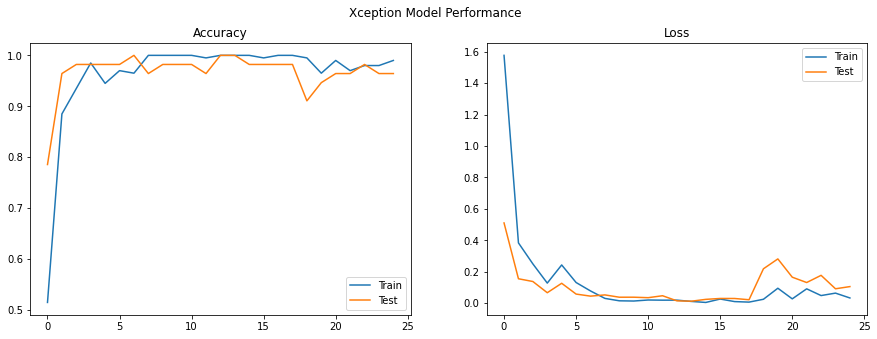

In [19]:
# Comparing performance metrics of the model
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(my_xception_model.history['accuracy'],label='Train')
plt.plot(my_xception_model.history['val_accuracy'],label='Test')
plt.title("Accuracy")
plt.legend()

plt.subplot(122)
plt.plot(my_xception_model.history['loss'],label='Train')
plt.plot(my_xception_model.history['val_loss'],label='Test')
plt.title("Loss")
plt.legend()
plt.suptitle("Xception Model Performance")
plt.show()

### Inference:

- The Xception Model gives a much better performance as compared to the base model with evident increase in performance but also exhibits overfitting.

- The base model accuracy on Train data is 99% and on Test data is 96%.

- The base model gives a loss of 0.03 on Train data and 0.10 on Test data.

- Further attempting one more pre-trained model in order to get more improvement.

<a id="vg"></a>
## VGG16 Model

In [13]:
train_datagen=ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_data=train_datagen.flow_from_directory("Alphabets_split_1/train",target_size=(32, 32),class_mode='categorical',
    batch_size=8)

Found 200 images belonging to 8 classes.


In [14]:
val_datagen=ImageDataGenerator(rescale=1./255)

val_data=val_datagen.flow_from_directory("Alphabets_split_1/val",target_size=(32, 32),class_mode='categorical',
    batch_size=8)

Found 56 images belonging to 8 classes.


In [22]:
# Excluding the Convolution layers of the VGG16 model and setting the input shape same as that of target size during Data Augmentation
model=VGG16(input_shape=(32,32,3),include_top=False)

In [23]:
# Train the weights of only the dense layers 
for layers in model.layers:
    if('dense' not in layers.name):
        layers.trainable=False
    if('dense' in layers.name):
        layers.trainable=True

In [24]:
#Adding the new dense layers to the VGG16 model
vgg16_model=Sequential([model,
                          Flatten(),
                          Dense(32,activation='relu'),
                          Dense(8,activation='softmax')])
vgg16_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                16416     
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 264       
Total params: 14,731,368
Trainable params: 16,680
Non-trainable params: 14,714,688
_________________________________________________________________


In [25]:
#Compiling the model using adam optimizer, loss as 'categorical_crossentropy' and metrics as accuracy
vgg16_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
ImageFile.LOAD_TRUNCATED_IMAGES = True
my_vgg16_model=vgg16_model.fit_generator(train_data,steps_per_epoch=200 //8,epochs=25,validation_data=val_data,validation_steps=56  //8)

Epoch 1/25
25/25 [==============================] - 5s 109ms/step - loss: 2.0623 - accuracy: 0.2500 - val_loss: 1.8176 - val_accuracy: 0.4821
Epoch 2/25
25/25 [==============================] - 2s 87ms/step - loss: 1.6268 - accuracy: 0.6950 - val_loss: 1.4782 - val_accuracy: 0.6964
Epoch 3/25
25/25 [==============================] - 2s 86ms/step - loss: 1.3055 - accuracy: 0.8100 - val_loss: 1.2071 - val_accuracy: 0.7321
Epoch 4/25
25/25 [==============================] - 2s 83ms/step - loss: 1.0873 - accuracy: 0.8300 - val_loss: 1.0140 - val_accuracy: 0.7857
Epoch 5/25
25/25 [==============================] - 2s 85ms/step - loss: 0.8645 - accuracy: 0.8850 - val_loss: 0.8572 - val_accuracy: 0.8571
Epoch 6/25
25/25 [==============================] - 2s 79ms/step - loss: 0.7362 - accuracy: 0.9250 - val_loss: 0.7417 - val_accuracy: 0.8571
Epoch 7/25
25/25 [==============================] - 2s 79ms/step - loss: 0.6286 - accuracy: 0.9200 - val_loss: 0.6565 - val_accuracy: 0.8571
Epoch 8/25
2

In [27]:
# Saving the Xception model 
vgg16_model.save("vgg16_model")

INFO:tensorflow:Assets written to: vgg16_model\assets


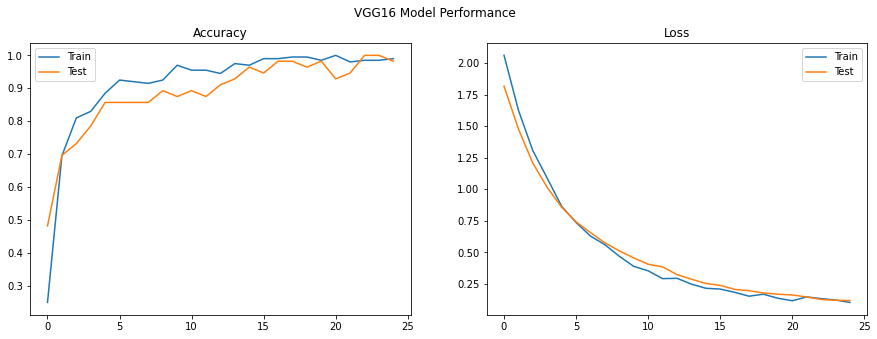

In [28]:
# Comparing performance metrics of the model
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(my_vgg16_model.history['accuracy'],label='Train')
plt.plot(my_vgg16_model.history['val_accuracy'],label='Test')
plt.title("Accuracy")
plt.legend()

plt.subplot(122)
plt.plot(my_vgg16_model.history['loss'],label='Train')
plt.plot(my_vgg16_model.history['val_loss'],label='Test')
plt.title("Loss")
plt.legend()
plt.suptitle("VGG16 Model Performance")
plt.show()

### Inference:

- Finally we get a model that gives the best accuracy and least amount of loss. ALso ensuring that overfitting is to it's minimum.

- The accuracy on Train data is 99% and on Test data is 98.2%.

- The loss is 0.10 on Train data and 0.11 at Test data.

- This model is considered the final model and is used further for obtaining predictions.

<a id="cm"></a>
## Comparison of Models

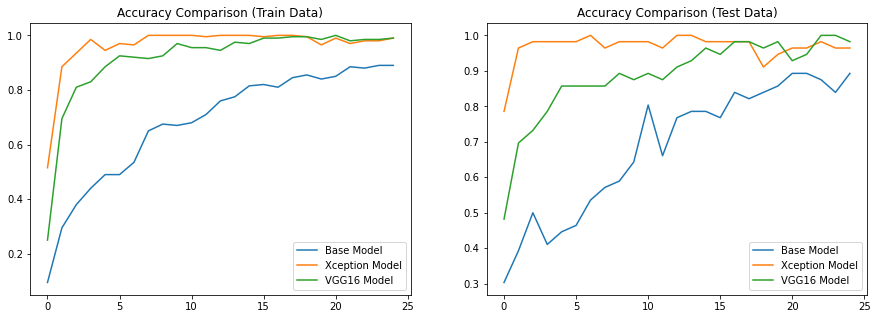

In [49]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(my_base_model.history['accuracy'],label="Base Model")
plt.plot(my_xception_model.history['accuracy'],label='Xception Model')
plt.plot(my_vgg16_model.history['accuracy'],label="VGG16 Model")
plt.legend()
plt.title("Accuracy Comparison (Train Data)")

plt.subplot(122)
plt.plot(my_base_model.history['val_accuracy'],label="Base Model")
plt.plot(my_xception_model.history['val_accuracy'],label='Xception Model')
plt.plot(my_vgg16_model.history['val_accuracy'],label="VGG16 Model")
plt.legend()
plt.title("Accuracy Comparison (Test Data)")
plt.show()

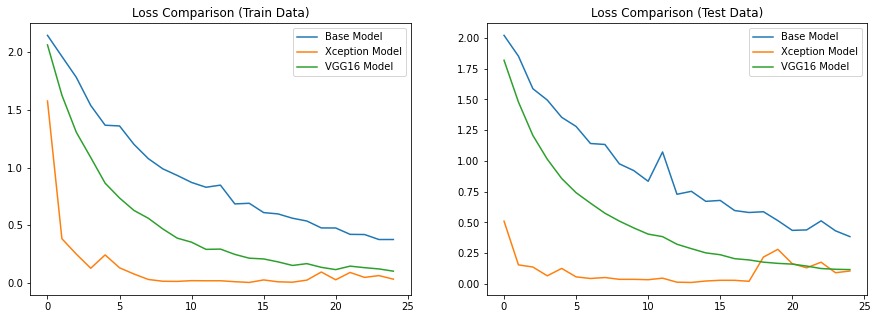

In [48]:
plt.figure(figsize=(15,5))
plt.subplot(121)

plt.plot(my_base_model.history['loss'],label="Base Model")
plt.plot(my_xception_model.history['loss'],label='Xception Model')
plt.plot(my_vgg16_model.history['loss'],label="VGG16 Model")
plt.legend()
plt.title("Loss Comparison (Train Data)")

plt.subplot(122)

plt.plot(my_base_model.history['val_loss'],label="Base Model")
plt.plot(my_xception_model.history['val_loss'],label='Xception Model')
plt.plot(my_vgg16_model.history['val_loss'],label="VGG16 Model")
plt.legend()
plt.title("Loss Comparison (Test Data)")
plt.show()

<a id="op"></a>
## Obtaining predictions using Images:

In [4]:
vgg16_model=load_model("vgg16_model")

In [17]:
# Creating a function to obtain predictions
def prediction(model,image_path,image_shape,actual):
    img=cv2.imread(image_path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    test_image = image.load_img(image_path, target_size = (image_shape, image_shape))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image/255.)
    prediction=list(train_data.class_indices.keys())[np.argmax(result)]
    
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.imshow(img)
    plt.title("Actual:{}".format(actual),fontsize=20)

    plt.subplot(122)
    plt.imshow(img)
    plt.title("Predicted: {}".format(prediction),fontsize=20)
    plt.show()

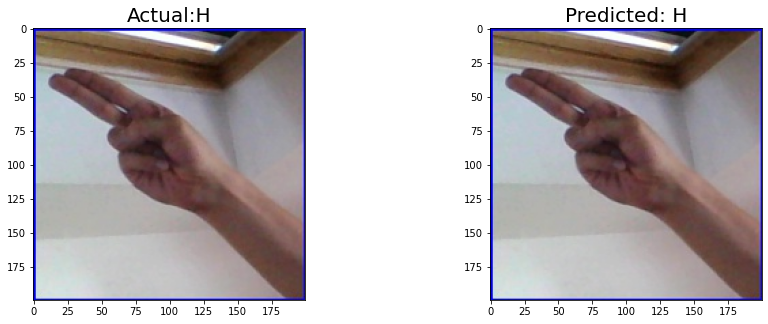

In [19]:
prediction(vgg16_model,"H1009.jpg",32,"H")

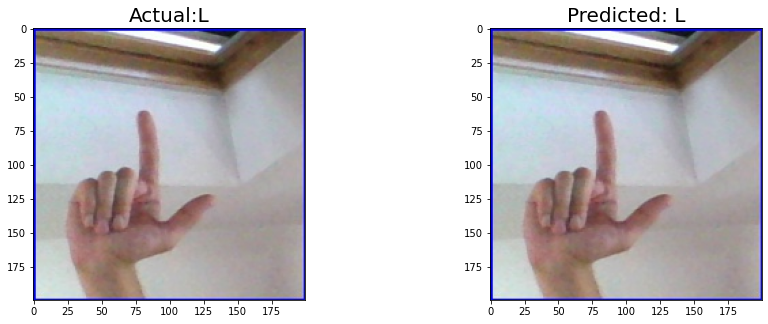

In [20]:
prediction(vgg16_model,"L1814.jpg",32,"L")

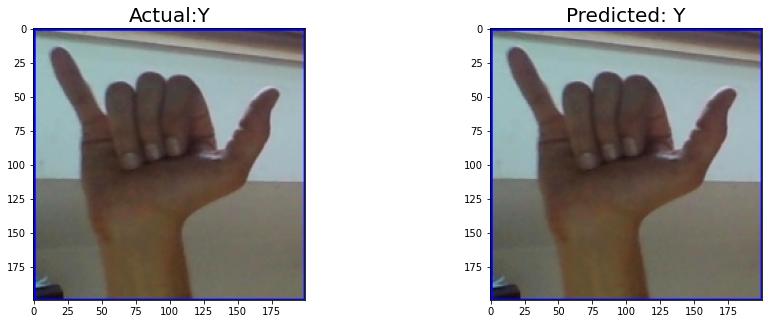

In [21]:
prediction(vgg16_model,"Y745.jpg",32,"Y")

<a id="co"></a>
## Conclusion:

- Among the three models built for the ASL Classification of Alphabets, the VGG16 model gave the best results, i.e training accuracy and loss of 99% and 0.1 respectively and validation accuracy and loss of 98.2% and 0.11 respectively.Hence the VGG16 model was used to make further predictions.

- In the project only 8 Alphabet classes with 32 images each were used.The project can be further imporved by using all 26 letters to predict each of the ASL letters.

- Also,multiple signs are used to portray an entire word, which can also be included in the project for further improvement.
